Scenario: Data analysis for targeted crime rate improvements. Audience: Detectives, police
Objectives:
1. Distribution of crimes
    - What type of crime is more common.
    - What are the top 5 crimes
2. Where are the top 5 crimes commited
    - Counts By City
    - Map visual
3. Victim demographics
    - Age
    - Sex
4. Conclusion
    - What areas could use additional police presence?
    - For cold cases involving these types of crimes, where should detectives look?
    - Public advisory for people fitting the victim's demographics


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from geopy.geocoders import Nominatim

In [2]:
crime_data = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
crime_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829778 entries, 0 to 829777
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           829778 non-null  int64  
 1   Date Rptd       829778 non-null  object 
 2   DATE OCC        829778 non-null  object 
 3   TIME OCC        829778 non-null  int64  
 4   AREA            829778 non-null  int64  
 5   AREA NAME       829778 non-null  object 
 6   Rpt Dist No     829778 non-null  int64  
 7   Part 1-2        829778 non-null  int64  
 8   Crm Cd          829778 non-null  int64  
 9   Crm Cd Desc     829778 non-null  object 
 10  Mocodes         714922 non-null  object 
 11  Vict Age        829778 non-null  int64  
 12  Vict Sex        720479 non-null  object 
 13  Vict Descent    720471 non-null  object 
 14  Premis Cd       829768 non-null  float64
 15  Premis Desc     829286 non-null  object 
 16  Weapon Used Cd  289319 non-null  float64
 17  Weapon Des

In [3]:
missing_data = crime_data.isnull().sum()
print(missing_data)

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           114856
Vict Age               0
Vict Sex          109299
Vict Descent      109307
Premis Cd             10
Premis Desc          492
Weapon Used Cd    540459
Weapon Desc       540459
Status                 0
Status Desc            0
Crm Cd 1              10
Crm Cd 2          768750
Crm Cd 3          827720
Crm Cd 4          829717
LOCATION               0
Cross Street      697270
LAT                    0
LON                    0
dtype: int64


In [8]:
# Check for duplicate rows
duplicate_rows = crime_data.duplicated().sum()
print("There are " + str(duplicate_rows) + " duplicate row(s).\n")

There are 0 duplicate row(s).



In [4]:
crime_data['Mocodes'].unique()

array(['0444 0913', '0416 1822 1414', '1501', ...,
       '0344 1606 1822 0314 1420', '1822 1266 0443 0448 0400 0431',
       '0601 0445 0416 0359'], dtype=object)

In [5]:
crime_data['Vict Sex'].unique()

array(['F', 'M', 'X', nan, 'H', '-'], dtype=object)

C:\Users\krrat\AppData\Local\Temp\ipykernel_19032\2930117420.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_data['Date Rptd'] = pd.to_datetime(crime_data['Date Rptd'])
C:\Users\krrat\AppData\Local\Temp\ipykernel_19032\2930117420.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'])
c:\Users\krrat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\krrat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

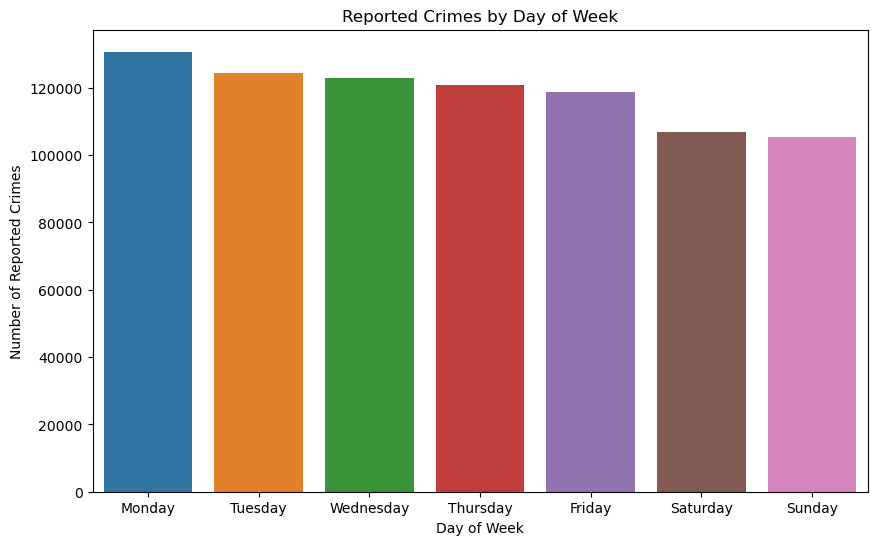

c:\Users\krrat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\krrat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


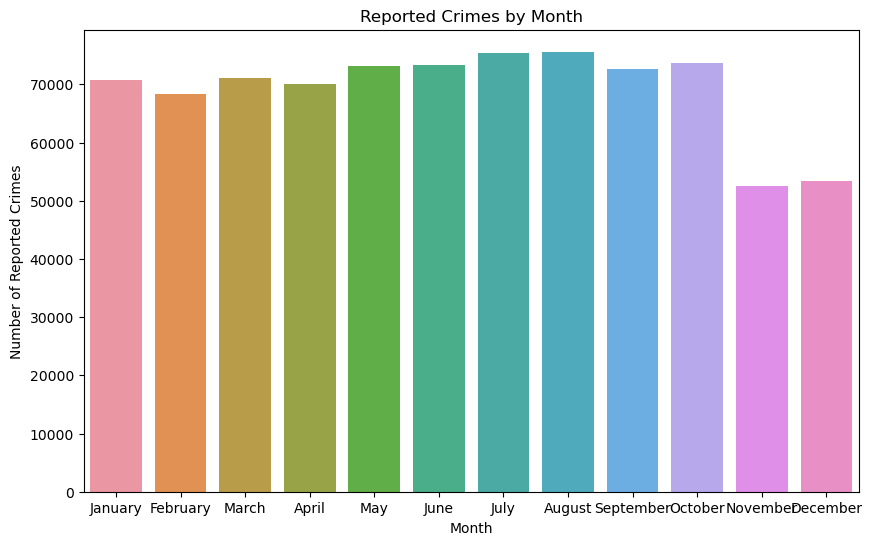

In [6]:
crime_data['Date Rptd'] = pd.to_datetime(crime_data['Date Rptd'])
crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'])

crime_data['Day of Week'] = crime_data['Date Rptd'].dt.day_name()
crime_data['Month'] = crime_data['Date Rptd'].dt.month_name()

plt.figure(figsize=(10, 6))
sns.countplot(x='Day of Week', data=crime_data, order=crime_data['Day of Week'].value_counts().index)
plt.title('Reported Crimes by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Reported Crimes')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=crime_data, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Reported Crimes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Reported Crimes')
plt.show()

c:\Users\krrat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\krrat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


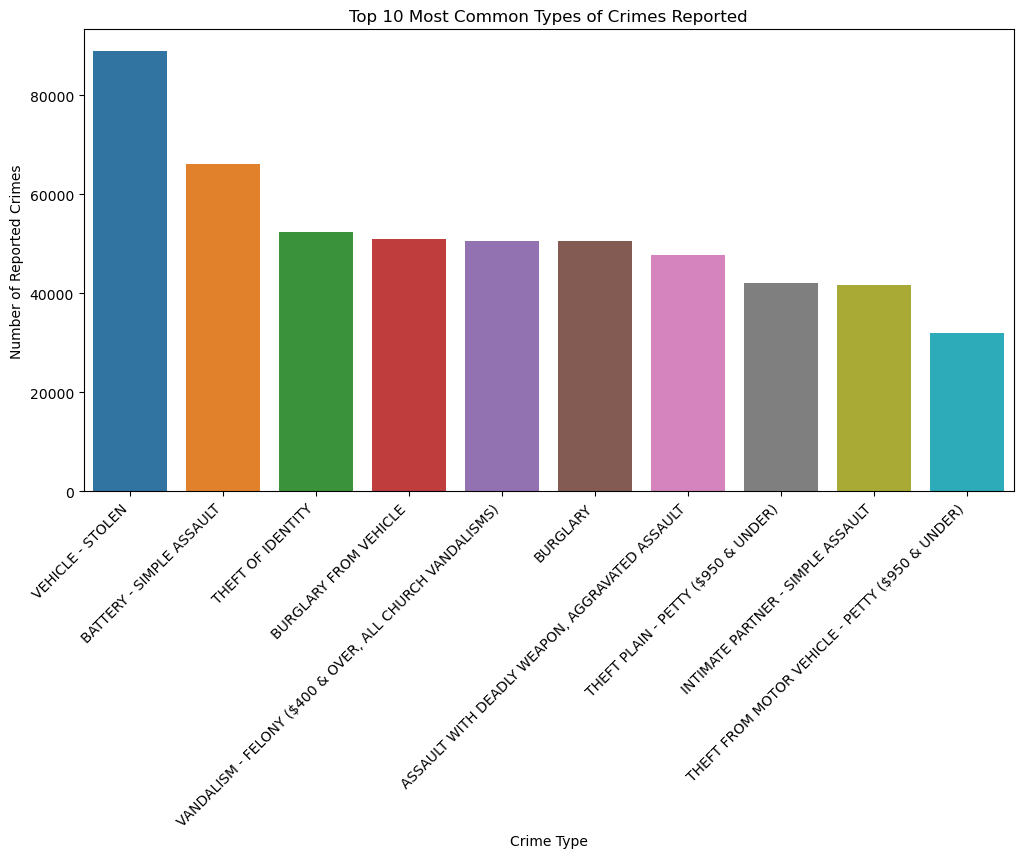

c:\Users\krrat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\krrat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


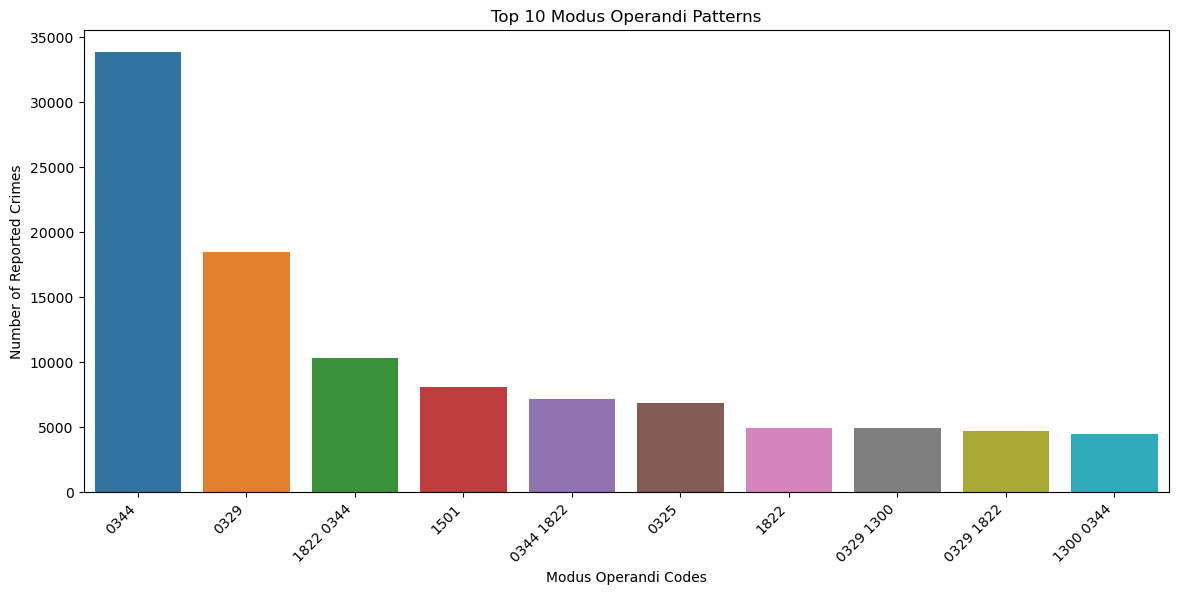

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Crm Cd Desc', data=crime_data, order=crime_data['Crm Cd Desc'].value_counts().index[:10])
plt.title('Top 10 Most Common Types of Crimes Reported')
plt.xlabel('Crime Type')
plt.ylabel('Number of Reported Crimes')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(14, 6))
sns.countplot(x='Mocodes', data=crime_data, order=crime_data['Mocodes'].value_counts().index[:10])
plt.title('Top 10 Modus Operandi Patterns')
plt.xlabel('Modus Operandi Codes')
plt.ylabel('Number of Reported Crimes')
plt.xticks(rotation=45, ha='right')
plt.show()

In [13]:
# Initialize Nominatim API
geolocator = Nominatim(user_agent="LACrimes")

In [16]:
Lat = "34.0141"
Long = "-118.2978"

location = geolocator.reverse(Lat+","+Long)
address = location.raw['address']

print(location)
city = address.get('city','')
print(city)

1210, West 39th Place, Exposition Park, Los Angeles, Los Angeles County, California, 90037, United States
Los Angeles


In [17]:
def get_City(Latitude, Longitude):
    location = geolocator.reverse(Latitude+","+Longitude)
    address = location.raw['address']
    city = address.get('city','')
    return(city)

In [18]:
get_City("34.0141","-118.2978")

'Los Angeles'

In [19]:
crime_data['city'] = get_City(crime_data['LAT'],crime_data['Long'])
crime_data.head()

KeyError: 'Long'

In [ ]:
# # plotting the top states for haunted places

# # import necessary libraries
# import matplotlib.pyplot as plt
# import seaborn as sns

# # set up plot and styles
# f, ax = plt.subplots(figsize=(12, 8))
# plt.subplots_adjust(hspace=0.3, wspace=0.5)
# sns.set_style('white')

# # Set up filter for states to be in descending order
# states_order = crime_data['state_abbrev'].value_counts().head(25).index

# # establish the plot
# sns.countplot(y="state_abbrev", data=crime_data, palette="flare_r", order=states_order, ax=ax)

# # set overall plot title
# ax.set_title('Most frequent states for personal accounts', fontsize=16, weight='bold', style='italic', y=1)

# # set x label
# ax.set_xlabel('Number of Haunted Places', weight='bold', style='italic', size=12)

# # set a custom y-axis label for `state`
# ax.text(-0.001, 1.015, 'State', weight='bold', size=10, style='italic',
#             verticalalignment='center', horizontalalignment='right', transform=ax.transAxes)
# # make default y-axis overall label disappear so it doesn't interfere with the custom y-axis label
# ax.set_ylabel('')

# # set background color
# ax.set_facecolor('lightgrey')

# # make y-axis label bold
# for label in ax.get_yticklabels():
#     label.set_weight('bold')

# # show the plot
# plt.show()